# Pre-mining the Online Mining batches for Training

In [1]:
"""Import from parent directory."""
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path: sys.path.append(module_path)

In [3]:
import pickle
from dataset.imagenetvid.curate_imagenet import make_training_pickle

In [ ]:
make_training_pickle(100000, 10, 4)

Loading training pickle...
Batch #: 0
Batch #: 10000
Batch #: 20000
Batch #: 30000
Batch #: 40000
Batch #: 50000
Batch #: 60000
Batch #: 70000
Batch #: 80000


In [51]:
pkl_file = open('dataset/imagenetvid/train_set.pkl', 'rb')
print(pickle.load(pkl_file))
pkl_file.close()

(['data/ILSVRC2015-VID-Curation/Data/VID/train/c/ILSVRC2015_train_00477000/000154.00.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/c/ILSVRC2015_train_00477000/000139.00.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/c/ILSVRC2015_train_00477000/000035.00.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/c/ILSVRC2015_train_00477000/000030.00.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/d/ILSVRC2015_train_00300012/000695.02.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/d/ILSVRC2015_train_00300012/000692.02.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/d/ILSVRC2015_train_00300012/001068.02.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/d/ILSVRC2015_train_00300012/001174.02.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/a/ILSVRC2015_train_00052003/000050.01.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/a/ILSVRC2015_train_00052003/000053.01.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID

In [52]:
import numpy as np
import matplotlib.pyplot as plt

pkl_file = open('dataset/imagenetvid/train_stats.pkl', 'rb')
stats = pickle.load(pkl_file)
pkl_file.close()

counts = {}
i = 0
for k, v in stats.items():
    counts[i] = v
    i += 1
    
if len(counts) < 30:
    print('missing some class!')

labels, values = zip(*counts.items())

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/imagenetvid/train_stats.pkl'

['data/ILSVRC2015-VID-Curation/Data/VID/train/c/ILSVRC2015_train_00477000/000154.00.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/c/ILSVRC2015_train_00477000/000139.00.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/c/ILSVRC2015_train_00477000/000035.00.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/c/ILSVRC2015_train_00477000/000030.00.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/d/ILSVRC2015_train_00300012/000695.02.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/d/ILSVRC2015_train_00300012/000692.02.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/d/ILSVRC2015_train_00300012/001068.02.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/d/ILSVRC2015_train_00300012/001174.02.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/a/ILSVRC2015_train_00052003/000050.01.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/a/ILSVRC2015_train_00052003/000053.01.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/

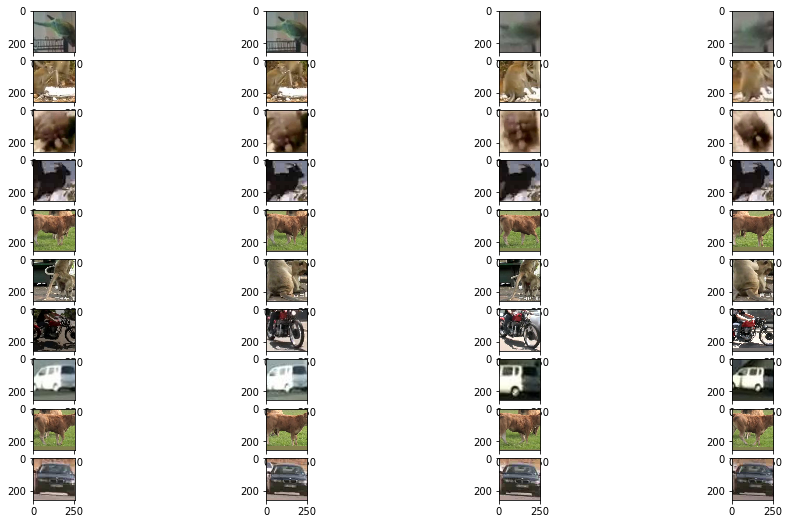

In [53]:
import random
from imageio import imread

plt.rcParams["figure.figsize"] = [16,9]

path = 'dataset/imagenetvid/train_set.pkl'

def get_next_batch(pkl_file_path):
    def _pickle_generator(pkl_file):
        try:
            while True:
                yield pickle.load(pkl_file)
        except EOFError:
            pass

    with open(pkl_file_path, 'rb') as f:
        for image_paths, labels in _pickle_generator(f):
            print(image_paths)
            images = [imread(img) for img in image_paths]
            yield (images, labels)
            
def plot_triplet_batch(images, labels):
    batches = {}
    for x, y in zip(images, labels):
        if y not in batches: batches[y] = []
        batches[y].append(x)
    rows = len(batches)
    cols = len(random.choice(batches))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i])

stop_at = 1
for x, y in get_next_batch(path):
    stop_at -= 1
    plot_triplet_batch(x, y)
    if stop_at < 1: break